In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nmi1.csv")
df.head()

,AESTTime,Load
0,2017-10-01 00:00:00,12.416
1,2017-10-01 00:30:00,12.192
2,2017-10-01 01:00:00,12.192
3,2017-10-01 01:30:00,11.712
4,2017-10-01 02:00:00,11.872


# Basic EDA

<Axes: xlabel='timestamp'>

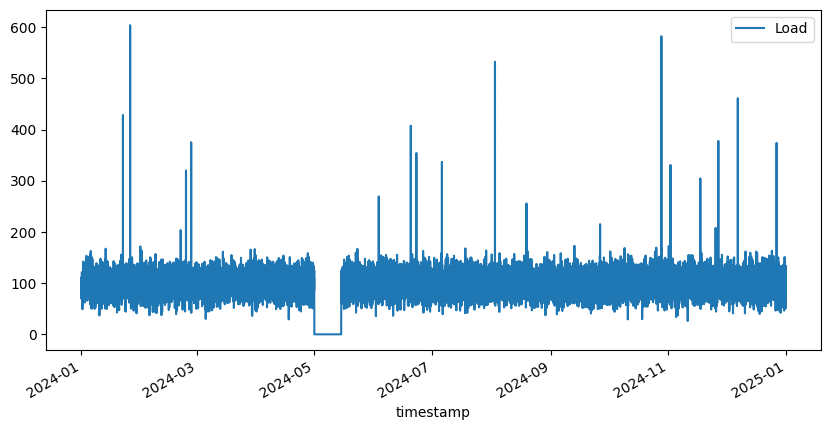

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(x="timestamp", y="load", ax=ax, label='Load')

### what else would you potentially add in your EDA?

In [65]:
# use plolty and plot the same data so I can interact with it
import plotly.express as px
fig = px.line(df, x='timestamp', y='load', title='Load over Time')
fig.show()
# use plotly to plot the data
import plotly.graph_objects as go

---

In [62]:
# 3. Feature Engineering
# Extract hour and day of week
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Mistake: incorrect scaling of the hour feature
df['hour_scaled'] = df['hour'] * 24  # Should be scaled between 0 and 1 using /23
df[['hour', 'hour_scaled']].head()

,hour,hour_scaled
0,0,0
1,0,0
2,1,24
3,1,24
4,2,48


In [63]:
# 4. Model Training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score  # Intentional mistake: wrong metric

# Prepare data
X = df[['hour_scaled', 'dayofweek']]
y = df['kwh']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
pred = model.predict(X)
print('Accuracy of regression model:', accuracy_score(y, pred.round()))  # Using accuracy_score on regression


ModuleNotFoundError: No module named 'sklearn'

## 5. Spot the Problem

- Identify and explain any issues in the model training and evaluation above.
- How would you correct them?

## 6. Git Workflow

What sequence of Git commands would you use to:

1. Create a new branch named `feature/forecast-task`
2. Stage your changes
3. Commit with the message "Initial live coding task"


Data sample from NMIA1.csv:


,AESTTime,Quantity,Unit
0,2017-10-01 00:00:00,12.416,kWh
1,2017-10-01 00:30:00,12.192,kWh
2,2017-10-01 01:00:00,12.192,kWh
3,2017-10-01 01:30:00,11.712,kWh
4,2017-10-01 02:00:00,11.872,kWh


In [73]:
df_consumption.drop(columns=["Unit"]).to_csv("power_consumption_cleaned.csv", index=False)

In [68]:
df_consumption

,AESTTime,Quantity,Unit
0,2017-10-01 00:00:00,7.99000,kWh
1,2017-10-01 00:15:00,7.00000,kWh
2,2017-10-01 00:30:00,8.20000,kWh
3,2017-10-01 00:45:00,8.01000,kWh
4,2017-10-01 01:00:00,9.01000,kWh
...,...,...,...
35035,2018-09-30 22:45:00,0.00784,Mwh
35036,2018-09-30 23:00:00,0.00791,Mwh
35037,2018-09-30 23:15:00,0.00772,Mwh
35038,2018-09-30 23:30:00,0.00815,Mwh
